# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Import Packages

In [3]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from numpy.random import seed
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout
from tensorflow.keras.layers import AveragePooling2D, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow
import pandas as pd

%matplotlib inline
from glob import glob

# File Directory and Original Length ***(don't rerun)***

In [ ]:
train_data_dir = "/content/drive/My Drive/Data/train"
test_data_dir = "/content/drive/My Drive/Data/test"

Pneumonia_img = os.listdir(train_data_dir + "/PNEUMONIA")
Normal_img = os.listdir(train_data_dir + "/NORMAL")
COVID19_img = os.listdir(train_data_dir + "/COVID19")

print("Pneumonia Length:", len(Pneumonia_img))
print("Normal Length:", len(Normal_img))
print("COVID-19 Length:", len(COVID19_img))

Pneumonia Length: 3418
Normal Length: 1266
COVID-19 Length: 1349


In [ ]:
Pneumonia_test = os.listdir(test_data_dir + "/PNEUMONIA")
Normal_test = os.listdir(test_data_dir + "/NORMAL")
COVID19_test = os.listdir(test_data_dir + "/COVID19")

print("TESTING LENGTH")
print("Pneumonia Length:", len(Pneumonia_test))
print("Normal Length:", len(Normal_test))
print("COVID-19 Length:", len(COVID19_test))

TESTING LENGTH
Pneumonia Length: 855
Normal Length: 317
COVID-19 Length: 116


# Varying Length

## 10% of each Category (total 728) ***(don't rerun)***

In [ ]:
import random
random_train_covid19 = random.sample(COVID19_img, int(len(COVID19_img)*.1))
random_train_normal = random.sample(Normal_img, int(len(Normal_img)*.1))
random_train_pneumonia = random.sample(Pneumonia_img, int(len(Pneumonia_img)*.1))

random_test_covid19 = random.sample(COVID19_test, int(len(COVID19_test)*.1))
random_test_normal = random.sample(Normal_test, int(len(Normal_test)*.1))
random_test_pneumonia = random.sample(Pneumonia_test, int(len(Pneumonia_test)*.1))

In [ ]:
print("Train set:\n========================================")
random_num_covid19 = len(random_train_covid19)
random_num_normal = len(random_train_normal)
random_num_pneumonia = len(random_train_pneumonia)
print(f"COVID19={random_num_covid19}")
print(f"NORMAL={random_num_normal}")
print(f"PNEUMONIA={random_num_pneumonia}")

print("Test set:\n========================================")
random_num_covid19_test = len(random_test_covid19)
random_num_normal_test = len(random_test_normal)
random_num_pneumonia_test = len(random_test_pneumonia)
print(f"COVID19={random_num_covid19_test}")
print(f"NORMAL={random_num_normal_test}")
print(f"PNEUMONIA={random_num_pneumonia_test}")


Train set:
COVID19=134
NORMAL=126
PNEUMONIA=341
Test set:
COVID19=11
NORMAL=31
PNEUMONIA=85


In [ ]:
# Save file into another directory
random_train_dir = '/content/drive/My Drive/Data/unique_sample_train'
random_test_dir = '/content/drive/My Drive/Data/unique_sample_test'

# Make train directory
os.makedirs(os.path.join(random_train_dir, 'COVID19'))
os.makedirs(os.path.join(random_train_dir, 'PNEUMONIA'))
os.makedirs(os.path.join(random_train_dir, 'NORMAL'))

# Make test directory
os.makedirs(os.path.join(random_test_dir, 'COVID19'))
os.makedirs(os.path.join(random_test_dir, 'PNEUMONIA'))
os.makedirs(os.path.join(random_test_dir, 'NORMAL'))

In [ ]:
import shutil
# Save train data
covid_path = '/content/drive/My Drive/Data/unique_sample_train/COVID19'
pneumonia_path = '/content/drive/My Drive/Data/unique_sample_train/PNEUMONIA'
norm_path = '/content/drive/My Drive/Data/unique_sample_train/NORMAL'

# random_train_covid19
for file in random_train_covid19:
  curr_file = train_data_dir + "/COVID19/" + file
  shutil.copy(curr_file, covid_path)

# # random_train_pneumonia
for file in random_train_pneumonia:
  curr_file = train_data_dir + "/PNEUMONIA/" + file
  shutil.copy(curr_file, pneumonia_path)

# # random_train_normal
for file in random_train_normal:
  curr_file = train_data_dir + "/NORMAL/" + file
  shutil.copy(curr_file, norm_path)

In [ ]:
print("Train set:\n========================================")
list = os.listdir(covid_path) # dir is your directory path
covid_number_files = len(list)
print(f"COVID19={covid_number_files}")

list = os.listdir(pneumonia_path)
pneumonia_number_files = len(list)
print(f"PNEUMONIA={pneumonia_number_files}")

list = os.listdir(norm_path)
norm_number_files = len(list)
print(f"NORMAL={norm_number_files}")


Train set:
COVID19=134
PNEUMONIA=341
NORMAL=126


In [ ]:
import shutil
# Save test data
covid_path = '/content/drive/My Drive/Data/unique_sample_test/COVID19'
pneumonia_path = '/content/drive/My Drive/Data/unique_sample_test/PNEUMONIA'
norm_path = '/content/drive/My Drive/Data/unique_sample_test/NORMAL'

# random_train_covid19
for file in random_test_covid19:
  curr_file = test_data_dir + "/COVID19/" + file
  shutil.copy(curr_file, covid_path)

# # random_train_pneumonia
for file in random_test_pneumonia:
  curr_file = test_data_dir + "/PNEUMONIA/" + file
  shutil.copy(curr_file, pneumonia_path)

# # random_train_normal
for file in random_test_normal:
  curr_file = test_data_dir + "/NORMAL/" + file
  shutil.copy(curr_file, norm_path)

In [ ]:
print("Test set:\n========================================")
list = os.listdir(covid_path) # dir is your directory path
covid_number_files = len(list)
print(f"COVID19={covid_number_files}")

list = os.listdir(pneumonia_path)
pneumonia_number_files = len(list)
print(f"PNEUMONIA={pneumonia_number_files}")

list = os.listdir(norm_path)
norm_number_files = len(list)
print(f"NORMAL={norm_number_files}")


Test set:
COVID19=11
PNEUMONIA=85
NORMAL=31


## Model run 1

## Small sample size: model run (10%)

In [ ]:
train_path = "/content/drive/My Drive/Data/unique_sample_train"
test_path = "/content/drive/My Drive/Data/unique_sample_test"

In [ ]:
path = train_path
diag_code_dict = {
    'COVID19': 0,
    'NORMAL': 1,
    'PNEUMONIA': 2}

diag_title_dict = {
    'COVID19': 'Covid-19',
    'NORMAL': 'Healthy',
    'PNEUMONIA': 'Pneumonia'}

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(path, '*','*.png'))}

imageid_path_dict

{}

In [ ]:
classes = ["COVID19", "NORMAL", "PNEUMONIA"]
num_classes = len(classes)



img_size = [224, 224]
train_datagen = ImageDataGenerator(rescale = 1./224)

test_datagen = ImageDataGenerator(rescale = 1./224)

train_gen = train_datagen.flow_from_directory(directory = train_path,
                                                        target_size = tuple(img_size),
                                                        batch_size = 16,
                                                        shuffle = True,
                                                        class_mode = 'categorical')

test_gen = test_datagen.flow_from_directory(directory = test_path,
                                                        target_size = tuple(img_size),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

Found 601 images belonging to 3 classes.
Found 127 images belonging to 3 classes.


In [ ]:
num_pneumonia = len(os.listdir(os.path.join(train_path, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_path, 'NORMAL')))
num_covid = len(os.listdir(os.path.join(train_path, 'COVID19')))

total = num_normal + num_pneumonia + num_covid
weight_for_0 = num_covid / total
weight_for_1 = num_normal / total
weight_for_2 = num_pneumonia / total
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten, 
    BatchNormalization, GlobalAveragePooling2D
)

base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)
x = Flatten()(x)

x = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(x)



predictions = Dense(3, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
mc = ModelCheckpoint("densenet_0dropout.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)

r = model.fit(
    train_gen, 
    epochs=5,
    callbacks=[mc,es],
    validation_data=test_gen,
    class_weight=class_weight
)

Epoch 1/5
38/38 [==============================] - 185s 5s/step - loss: 0.1522 - accuracy: 0.7870 - val_loss: 2.4085 - val_accuracy: 0.6693

Epoch 00001: val_loss improved from inf to 2.40850, saving model to densenet_0dropout.h5
Epoch 2/5
38/38 [==============================] - 25s 647ms/step - loss: 0.0746 - accuracy: 0.8968 - val_loss: 0.7553 - val_accuracy: 0.8268

Epoch 00002: val_loss improved from 2.40850 to 0.75527, saving model to densenet_0dropout.h5
Epoch 3/5
38/38 [==============================] - 25s 645ms/step - loss: 0.0728 - accuracy: 0.9218 - val_loss: 3.6581 - val_accuracy: 0.5118

Epoch 00003: val_loss did not improve from 0.75527
Epoch 4/5
38/38 [==============================] - 25s 646ms/step - loss: 0.0544 - accuracy: 0.9218 - val_loss: 0.3107 - val_accuracy: 0.8819

Epoch 00004: val_loss improved from 0.75527 to 0.31070, saving model to densenet_0dropout.h5
Epoch 5/5
38/38 [==============================] - 25s 620ms/step - loss: 0.0386 - accuracy: 0.9534 - va

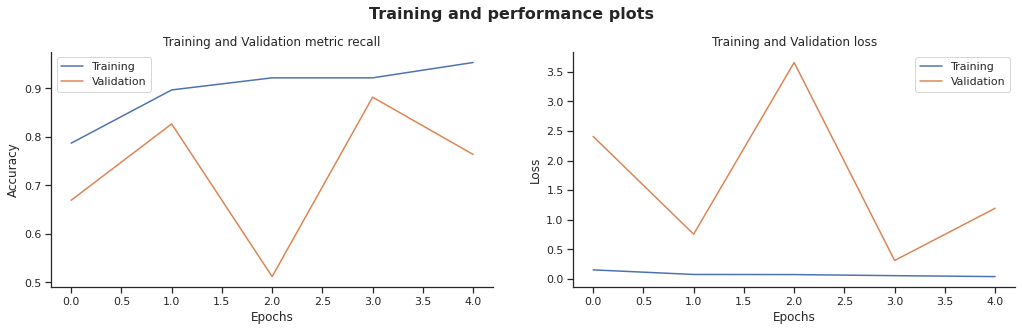

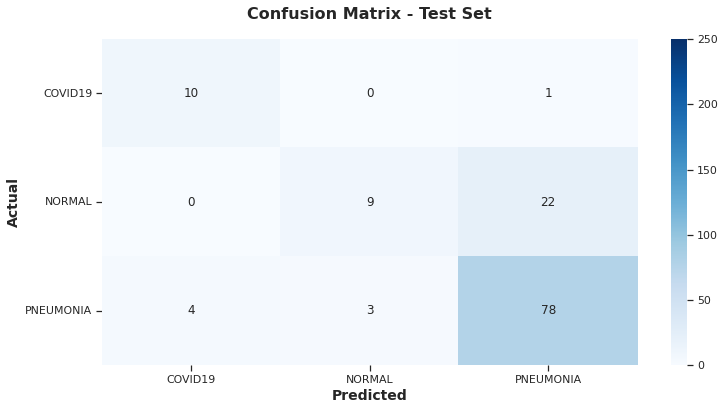

In [ ]:
y_pred = model.predict(test_gen)
fig, axarr = plt.subplots(1,2, figsize=(15,5), sharex=True)

sns.set(style="ticks", font_scale = 1)
sns.despine(top=True, right=True, left=False, bottom=False)
history = r

historyDF = pd.DataFrame.from_dict(history.history)
ax = sns.lineplot(x = historyDF.index, y = history.history['accuracy'], ax=axarr[0], label="Training");
ax = sns.lineplot(x = historyDF.index, y = history.history['val_accuracy'], ax=axarr[0], label="Validation");
ax.set_ylabel('Accuracy')

ax = sns.lineplot(x = historyDF.index, y = history.history['loss'], ax=axarr[1], label="Training");
ax = sns.lineplot(x = historyDF.index, y = history.history['val_loss'], ax=axarr[1], label="Validation");
ax.set_ylabel('Loss')


axarr[0].set_title('Training and Validation metric recall')
axarr[1].set_title('Training and Validation loss')

for ax in axarr:
    ax.set_xlabel('Epochs')

plt.suptitle('Training and performance plots', fontsize=16, weight='bold');
fig.tight_layout(pad=3.0)
plt.show()

predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_gen.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [ ]:
model.evaluate(train_gen)
model.evaluate(test_gen)

8/8 [==============================] - 4s 435ms/step - loss: 1.1937 - accuracy: 0.7638


[1.1937098503112793, 0.7637795209884644]

## Model run 2

## Small sample size: model run (20%)

In [ ]:
train_path = "/content/drive/My Drive/Data/unique_20_sample_train"
test_path = "/content/drive/My Drive/Data/unique_20_sample_test"

In [ ]:
path = train_path
diag_code_dict = {
    'COVID19': 0,
    'NORMAL': 1,
    'PNEUMONIA': 2}

diag_title_dict = {
    'COVID19': 'Covid-19',
    'NORMAL': 'Healthy',
    'PNEUMONIA': 'Pneumonia'}

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(path, '*','*.png'))}

imageid_path_dict

{}

In [ ]:
classes = ["COVID19", "NORMAL", "PNEUMONIA"]
num_classes = len(classes)



img_size = [224, 224]
train_datagen = ImageDataGenerator(rescale = 1./224)

test_datagen = ImageDataGenerator(rescale = 1./224)

train_gen = train_datagen.flow_from_directory(directory = train_path,
                                                        target_size = tuple(img_size),
                                                        batch_size = 16,
                                                        shuffle = True,
                                                        class_mode = 'categorical')

test_gen = test_datagen.flow_from_directory(directory = test_path,
                                                        target_size = tuple(img_size),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

Found 1205 images belonging to 3 classes.
Found 257 images belonging to 3 classes.


In [ ]:
num_pneumonia = len(os.listdir(os.path.join(train_path, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_path, 'NORMAL')))
num_covid = len(os.listdir(os.path.join(train_path, 'COVID19')))

total = num_normal + num_pneumonia + num_covid
weight_for_0 = num_covid / total
weight_for_1 = num_normal / total
weight_for_2 = num_pneumonia / total
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten, 
    BatchNormalization, GlobalAveragePooling2D
)

base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)
x = Flatten()(x)

x = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(x)



predictions = Dense(3, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
mc = ModelCheckpoint("densenet_0dropout.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)

r = model.fit(
    train_gen, 
    epochs=5,
    callbacks=[mc,es],
    validation_data=test_gen,
    class_weight=class_weight
)

29097984/29084464 [==============================] - 0s 0us/step
Epoch 1/5
76/76 [==============================] - 390s 5s/step - loss: 0.1096 - accuracy: 0.8573 - val_loss: 6.8673 - val_accuracy: 0.2529

Epoch 00001: val_loss improved from inf to 6.86729, saving model to densenet_0dropout.h5
Epoch 2/5
76/76 [==============================] - 47s 618ms/step - loss: 0.0802 - accuracy: 0.9012 - val_loss: 0.5909 - val_accuracy: 0.8132

Epoch 00002: val_loss improved from 6.86729 to 0.59091, saving model to densenet_0dropout.h5
Epoch 3/5
76/76 [==============================] - 47s 615ms/step - loss: 0.0626 - accuracy: 0.9195 - val_loss: 0.9926 - val_accuracy: 0.7510

Epoch 00003: val_loss did not improve from 0.59091
Epoch 4/5
76/76 [==============================] - 47s 614ms/step - loss: 0.0577 - accuracy: 0.9162 - val_loss: 0.7727 - val_accuracy: 0.7704

Epoch 00004: val_loss did not improve from 0.59091
Epoch 5/5
76/76 [==============================] - 47s 612ms/step - loss: 0.0581 

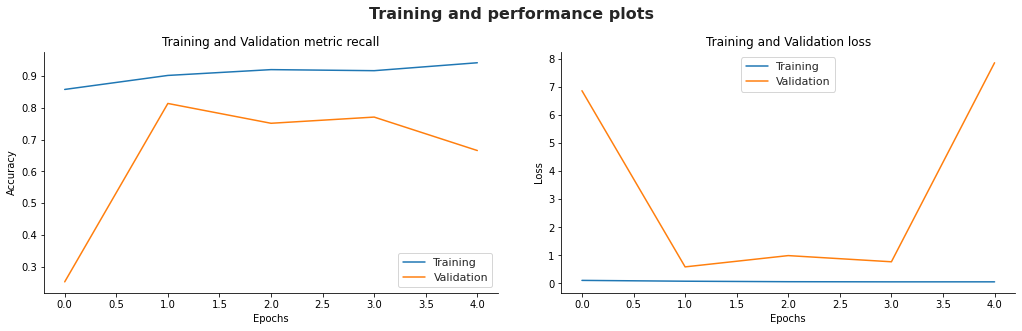

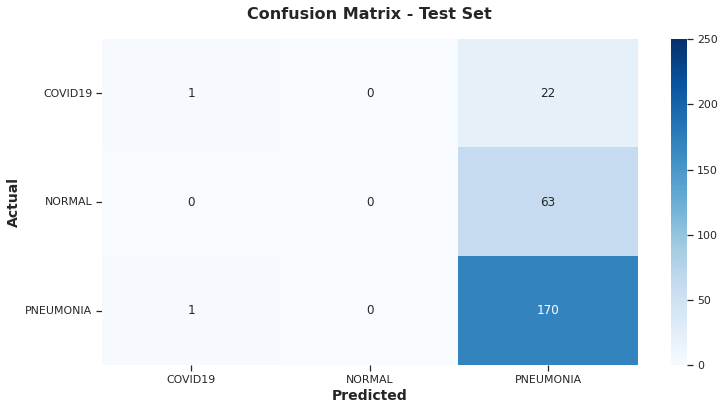

In [ ]:
y_pred = model.predict(test_gen)
fig, axarr = plt.subplots(1,2, figsize=(15,5), sharex=True)

sns.set(style="ticks", font_scale = 1)
sns.despine(top=True, right=True, left=False, bottom=False)
history = r

historyDF = pd.DataFrame.from_dict(history.history)
ax = sns.lineplot(x = historyDF.index, y = history.history['accuracy'], ax=axarr[0], label="Training");
ax = sns.lineplot(x = historyDF.index, y = history.history['val_accuracy'], ax=axarr[0], label="Validation");
ax.set_ylabel('Accuracy')

ax = sns.lineplot(x = historyDF.index, y = history.history['loss'], ax=axarr[1], label="Training");
ax = sns.lineplot(x = historyDF.index, y = history.history['val_loss'], ax=axarr[1], label="Validation");
ax.set_ylabel('Loss')


axarr[0].set_title('Training and Validation metric recall')
axarr[1].set_title('Training and Validation loss')

for ax in axarr:
    ax.set_xlabel('Epochs')

plt.suptitle('Training and performance plots', fontsize=16, weight='bold');
fig.tight_layout(pad=3.0)
plt.show()

predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_gen.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [ ]:
model.evaluate(train_gen)
model.evaluate(test_gen)

17/17 [==============================] - 8s 412ms/step - loss: 7.8630 - accuracy: 0.6654


[7.863019943237305, 0.6653696298599243]

## Model run 3


## Small sample size: model run (60%)

In [ ]:
train_path = "/content/drive/My Drive/Data/unique_60_sample_train"
test_path = "/content/drive/My Drive/Data/unique_60_sample_test"

In [ ]:
path = train_path
diag_code_dict = {
    'COVID19': 0,
    'NORMAL': 1,
    'PNEUMONIA': 2}

diag_title_dict = {
    'COVID19': 'Covid-19',
    'NORMAL': 'Healthy',
    'PNEUMONIA': 'Pneumonia'}

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(path, '*','*.png'))}

imageid_path_dict

{}

In [ ]:
classes = ["COVID19", "NORMAL", "PNEUMONIA"]
num_classes = len(classes)



img_size = [224, 224]
train_datagen = ImageDataGenerator(rescale = 1./224)

test_datagen = ImageDataGenerator(rescale = 1./224)

train_gen = train_datagen.flow_from_directory(directory = train_path,
                                                        target_size = tuple(img_size),
                                                        batch_size = 16,
                                                        shuffle = True,
                                                        class_mode = 'categorical')

test_gen = test_datagen.flow_from_directory(directory = test_path,
                                                        target_size = tuple(img_size),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

Found 3618 images belonging to 3 classes.
Found 772 images belonging to 3 classes.


In [ ]:
num_pneumonia = len(os.listdir(os.path.join(train_path, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_path, 'NORMAL')))
num_covid = len(os.listdir(os.path.join(train_path, 'COVID19')))

total = num_normal + num_pneumonia + num_covid
weight_for_0 = num_covid / total
weight_for_1 = num_normal / total
weight_for_2 = num_pneumonia / total
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten, 
    BatchNormalization, GlobalAveragePooling2D
)

base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)
x = Flatten()(x)

x = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(x)



predictions = Dense(3, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
mc = ModelCheckpoint("densenet_0dropout.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)

r = model.fit(
    train_gen, 
    epochs=5,
    callbacks=[mc,es],
    validation_data=test_gen,
    class_weight=class_weight
)

Epoch 1/5
227/227 [==============================] - 1078s 5s/step - loss: 0.0912 - accuracy: 0.8903 - val_loss: 6.0009 - val_accuracy: 0.2642

Epoch 00001: val_loss improved from inf to 6.00085, saving model to densenet_0dropout.h5
Epoch 2/5
227/227 [==============================] - 142s 623ms/step - loss: 0.0680 - accuracy: 0.9140 - val_loss: 14.4349 - val_accuracy: 0.2798

Epoch 00002: val_loss did not improve from 6.00085
Epoch 3/5
227/227 [==============================] - 140s 616ms/step - loss: 0.0554 - accuracy: 0.9273 - val_loss: 0.9277 - val_accuracy: 0.7630

Epoch 00003: val_loss improved from 6.00085 to 0.92766, saving model to densenet_0dropout.h5
Epoch 4/5
227/227 [==============================] - 140s 615ms/step - loss: 0.0412 - accuracy: 0.9522 - val_loss: 0.1812 - val_accuracy: 0.9249

Epoch 00004: val_loss improved from 0.92766 to 0.18118, saving model to densenet_0dropout.h5
Epoch 5/5
227/227 [==============================] - 140s 616ms/step - loss: 0.0408 - accur

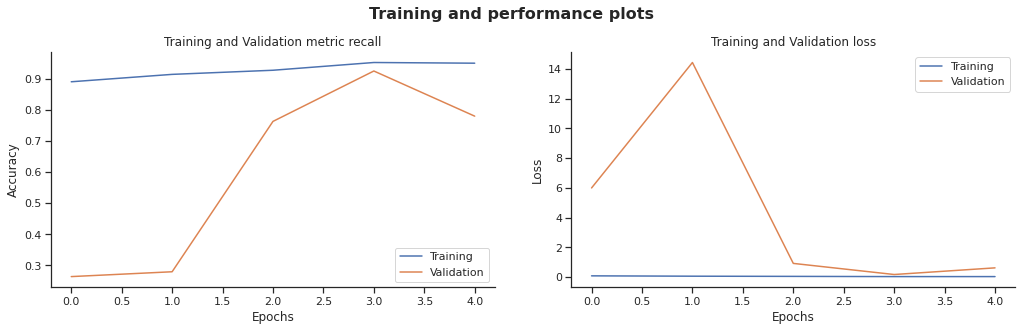

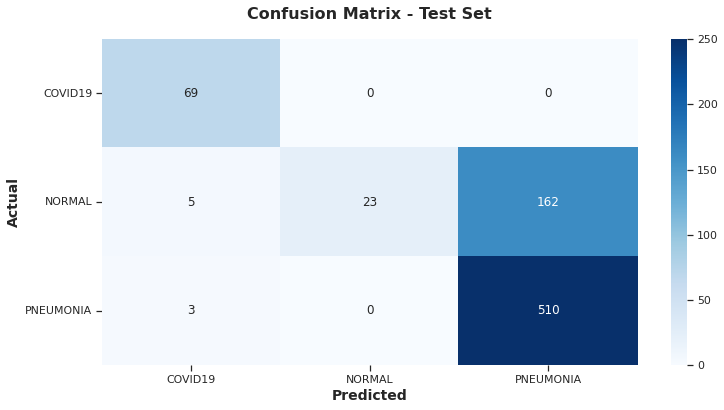

In [ ]:
y_pred = model.predict(test_gen)
fig, axarr = plt.subplots(1,2, figsize=(15,5), sharex=True)

sns.set(style="ticks", font_scale = 1)
sns.despine(top=True, right=True, left=False, bottom=False)
history = r

historyDF = pd.DataFrame.from_dict(history.history)
ax = sns.lineplot(x = historyDF.index, y = history.history['accuracy'], ax=axarr[0], label="Training");
ax = sns.lineplot(x = historyDF.index, y = history.history['val_accuracy'], ax=axarr[0], label="Validation");
ax.set_ylabel('Accuracy')

ax = sns.lineplot(x = historyDF.index, y = history.history['loss'], ax=axarr[1], label="Training");
ax = sns.lineplot(x = historyDF.index, y = history.history['val_loss'], ax=axarr[1], label="Validation");
ax.set_ylabel('Loss')


axarr[0].set_title('Training and Validation metric recall')
axarr[1].set_title('Training and Validation loss')

for ax in axarr:
    ax.set_xlabel('Epochs')

plt.suptitle('Training and performance plots', fontsize=16, weight='bold');
fig.tight_layout(pad=3.0)
plt.show()

predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_gen.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [ ]:
model.evaluate(train_gen)
model.evaluate(test_gen)

49/49 [==============================] - 21s 422ms/step - loss: 0.6280 - accuracy: 0.7798


[0.6279810070991516, 0.7797927260398865]

## Model Run 4

## Small sample size: model run (5%)

In [4]:
train_path = "/content/drive/My Drive/Data/unique_5_sample_train"
test_path = "/content/drive/My Drive/Data/unique_5_sample_test"

In [5]:
path = train_path
diag_code_dict = {
    'COVID19': 0,
    'NORMAL': 1,
    'PNEUMONIA': 2}

diag_title_dict = {
    'COVID19': 'Covid-19',
    'NORMAL': 'Healthy',
    'PNEUMONIA': 'Pneumonia'}

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(path, '*','*.png'))}

imageid_path_dict

{}

In [6]:
classes = ["COVID19", "NORMAL", "PNEUMONIA"]
num_classes = len(classes)



img_size = [224, 224]
train_datagen = ImageDataGenerator(rescale = 1./224)

test_datagen = ImageDataGenerator(rescale = 1./224)

train_gen = train_datagen.flow_from_directory(directory = train_path,
                                                        target_size = tuple(img_size),
                                                        batch_size = 16,
                                                        shuffle = True,
                                                        class_mode = 'categorical')

test_gen = test_datagen.flow_from_directory(directory = test_path,
                                                        target_size = tuple(img_size),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

Found 300 images belonging to 3 classes.
Found 62 images belonging to 3 classes.


In [7]:
num_pneumonia = len(os.listdir(os.path.join(train_path, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_path, 'NORMAL')))
num_covid = len(os.listdir(os.path.join(train_path, 'COVID19')))

total = num_normal + num_pneumonia + num_covid
weight_for_0 = num_covid / total
weight_for_1 = num_normal / total
weight_for_2 = num_pneumonia / total
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

In [8]:
from keras.applications.densenet import DenseNet121
from keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten, 
    BatchNormalization, GlobalAveragePooling2D
)

base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)
x = Flatten()(x)

x = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(x)



predictions = Dense(3, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
mc = ModelCheckpoint("densenet_0dropout.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)

r = model.fit(
    train_gen, 
    epochs=5,
    callbacks=[mc,es],
    validation_data=test_gen,
    class_weight=class_weight
)

29097984/29084464 [==============================] - 0s 0us/step
Epoch 1/5
19/19 [==============================] - 126s 4s/step - loss: 0.1600 - accuracy: 0.7500 - val_loss: 1.8468 - val_accuracy: 0.7097

Epoch 00001: val_loss improved from inf to 1.84680, saving model to densenet_0dropout.h5
Epoch 2/5
19/19 [==============================] - 13s 653ms/step - loss: 0.0861 - accuracy: 0.9133 - val_loss: 1.6982 - val_accuracy: 0.7097

Epoch 00002: val_loss improved from 1.84680 to 1.69823, saving model to densenet_0dropout.h5
Epoch 3/5
19/19 [==============================] - 12s 649ms/step - loss: 0.0497 - accuracy: 0.9500 - val_loss: 0.4539 - val_accuracy: 0.8226

Epoch 00003: val_loss improved from 1.69823 to 0.45394, saving model to densenet_0dropout.h5
Epoch 4/5
19/19 [==============================] - 12s 644ms/step - loss: 0.0681 - accuracy: 0.8967 - val_loss: 8.5353 - val_accuracy: 0.0806

Epoch 00004: val_loss did not improve from 0.45394
Epoch 5/5
19/19 [======================

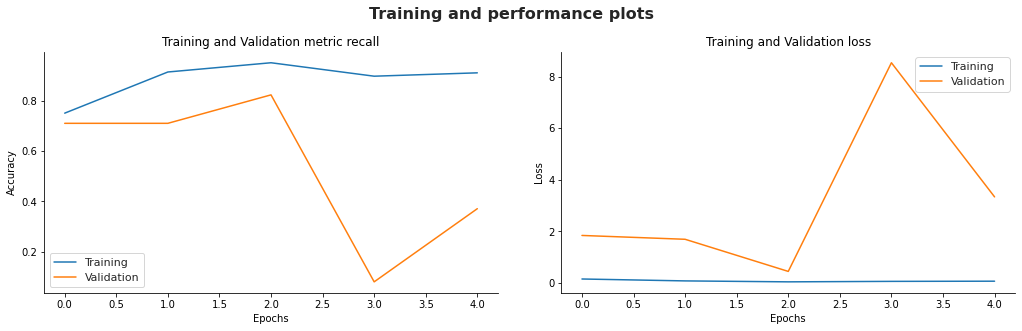

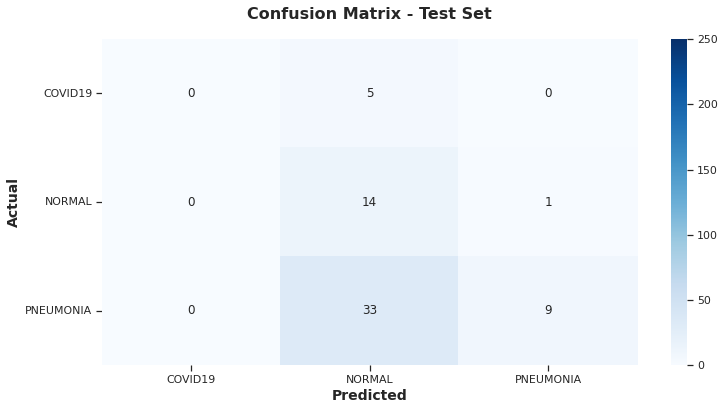

In [9]:
y_pred = model.predict(test_gen)
fig, axarr = plt.subplots(1,2, figsize=(15,5), sharex=True)

sns.set(style="ticks", font_scale = 1)
sns.despine(top=True, right=True, left=False, bottom=False)
history = r

historyDF = pd.DataFrame.from_dict(history.history)
ax = sns.lineplot(x = historyDF.index, y = history.history['accuracy'], ax=axarr[0], label="Training");
ax = sns.lineplot(x = historyDF.index, y = history.history['val_accuracy'], ax=axarr[0], label="Validation");
ax.set_ylabel('Accuracy')

ax = sns.lineplot(x = historyDF.index, y = history.history['loss'], ax=axarr[1], label="Training");
ax = sns.lineplot(x = historyDF.index, y = history.history['val_loss'], ax=axarr[1], label="Validation");
ax.set_ylabel('Loss')


axarr[0].set_title('Training and Validation metric recall')
axarr[1].set_title('Training and Validation loss')

for ax in axarr:
    ax.set_xlabel('Epochs')

plt.suptitle('Training and performance plots', fontsize=16, weight='bold');
fig.tight_layout(pad=3.0)
plt.show()

predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_gen.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [10]:
model.evaluate(train_gen)
model.evaluate(test_gen)

4/4 [==============================] - 2s 359ms/step - loss: 3.3404 - accuracy: 0.3710


[3.3404088020324707, 0.3709677457809448]